In [52]:
import numpy as np
import pandas as pd
from giessen_data_analysis import analyseGiessen

In [53]:
file_path = "FitPH/output_real/pat_1"

In [57]:
rv_file = pd.read_csv(f"{file_path}/raw_data.csv")

# Here takes all Pressure traces from step 1
rv_file[["Pressure", "cPressure"]] = rv_file[["Pressure [mmHg]", "Compensated Pressure [mmHg]"]]

ag = analyseGiessen(df=rv_file, t_resolution=0.001)
ag.sigma_filter_pressure = 1000 * 0.03  # 0.1s filter
ag.sigma_filter_d2pdt2 = 1000 * 0.02  # 0.1s filter
ag.compute_derivatives()
ag.compute_points_of_interest()
beats = pd.DataFrame(ag.resample_heart_beat())
sumstats = ag.points_df

resampled_df = pd.concat([beats, sumstats.iloc[:-1, :]], axis=1)
resampled_df.to_csv(f"{file_path}/waveform_resampled_all_pressure_traces_rv.csv", index=False)

In [55]:
ag.points_df

,a_epad_ind,epad_ind,dia_ind,sys_ind,esp_ind,edp_ind,eivc_ind,t_max_dpdt,t_min_dpdt,t_max_p,...,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR,edp,eivc
0,927,618,230,789,874,570,654,0.388,0.697,0.559,...,48.344716,62.125423,0.343668,1.423970,0.024552,0.523620,0.768,78.125000,12.398684,43.458199
1,1717,1395,998,1564,1665,1349,1431,0.397,0.719,0.566,...,45.284937,62.712958,0.393175,1.994172,0.019566,0.647921,0.782,76.726343,12.332254,43.052836
2,2507,2183,1780,2351,2453,2136,2223,0.403,0.727,0.571,...,48.543211,63.410406,0.345982,-0.933167,0.026214,0.529010,0.801,74.906367,13.999294,44.696599
3,3292,2963,2581,3134,3239,2917,3000,0.382,0.711,0.553,...,51.318773,67.047650,0.366591,0.260639,0.026389,0.578760,0.784,76.530612,14.763243,47.119538
4,4064,3742,3365,3914,4012,3696,3779,0.377,0.699,0.549,...,48.559587,65.234537,0.378018,2.257286,0.022611,0.607763,0.768,78.125000,13.318221,45.658495
5,4839,4526,4133,4696,4789,4469,4570,0.393,0.706,0.563,...,48.494544,63.240669,0.346899,1.169748,0.024712,0.531157,0.783,76.628352,10.051941,46.002015
6,5446,5135,4916,5314,5380,5088,5177,0.219,0.530,0.398,...,50.017599,58.529170,0.283088,0.642506,0.025573,0.394871,0.607,98.846787,7.690783,40.870277
7,6412,6079,5523,6243,6352,6035,6115,0.556,0.889,0.720,...,55.935067,71.778932,0.333861,0.310813,0.027699,0.501189,0.967,62.047570,15.589863,48.395983
8,7011,6712,6490,6890,6921,6662,6757,0.222,0.521,0.400,...,58.292602,60.500763,0.189802,1.681643,0.029497,0.234266,0.603,99.502488,9.359192,45.481944
9,7950,7626,7093,7793,7898,7584,7663,0.533,0.857,0.700,...,51.704945,70.030158,0.375448,3.942010,0.023895,0.601148,0.933,64.308682,14.414754,48.522388


(<Figure size 2000x2100 with 7 Axes>,
 array([<Axes: ylabel='Pressure [mmHg]'>, <Axes: ylabel='Pressure [mmHg]'>,
        <Axes: >, <Axes: ylabel='$mmHg/s$'>, <Axes: ylabel='$mmHg/s^2$'>,
        <Axes: ylabel='Acc [G]'>,
        <Axes: xlabel='Time [H:M:S]', ylabel='Temp. [$^oC$]'>],
       dtype=object))

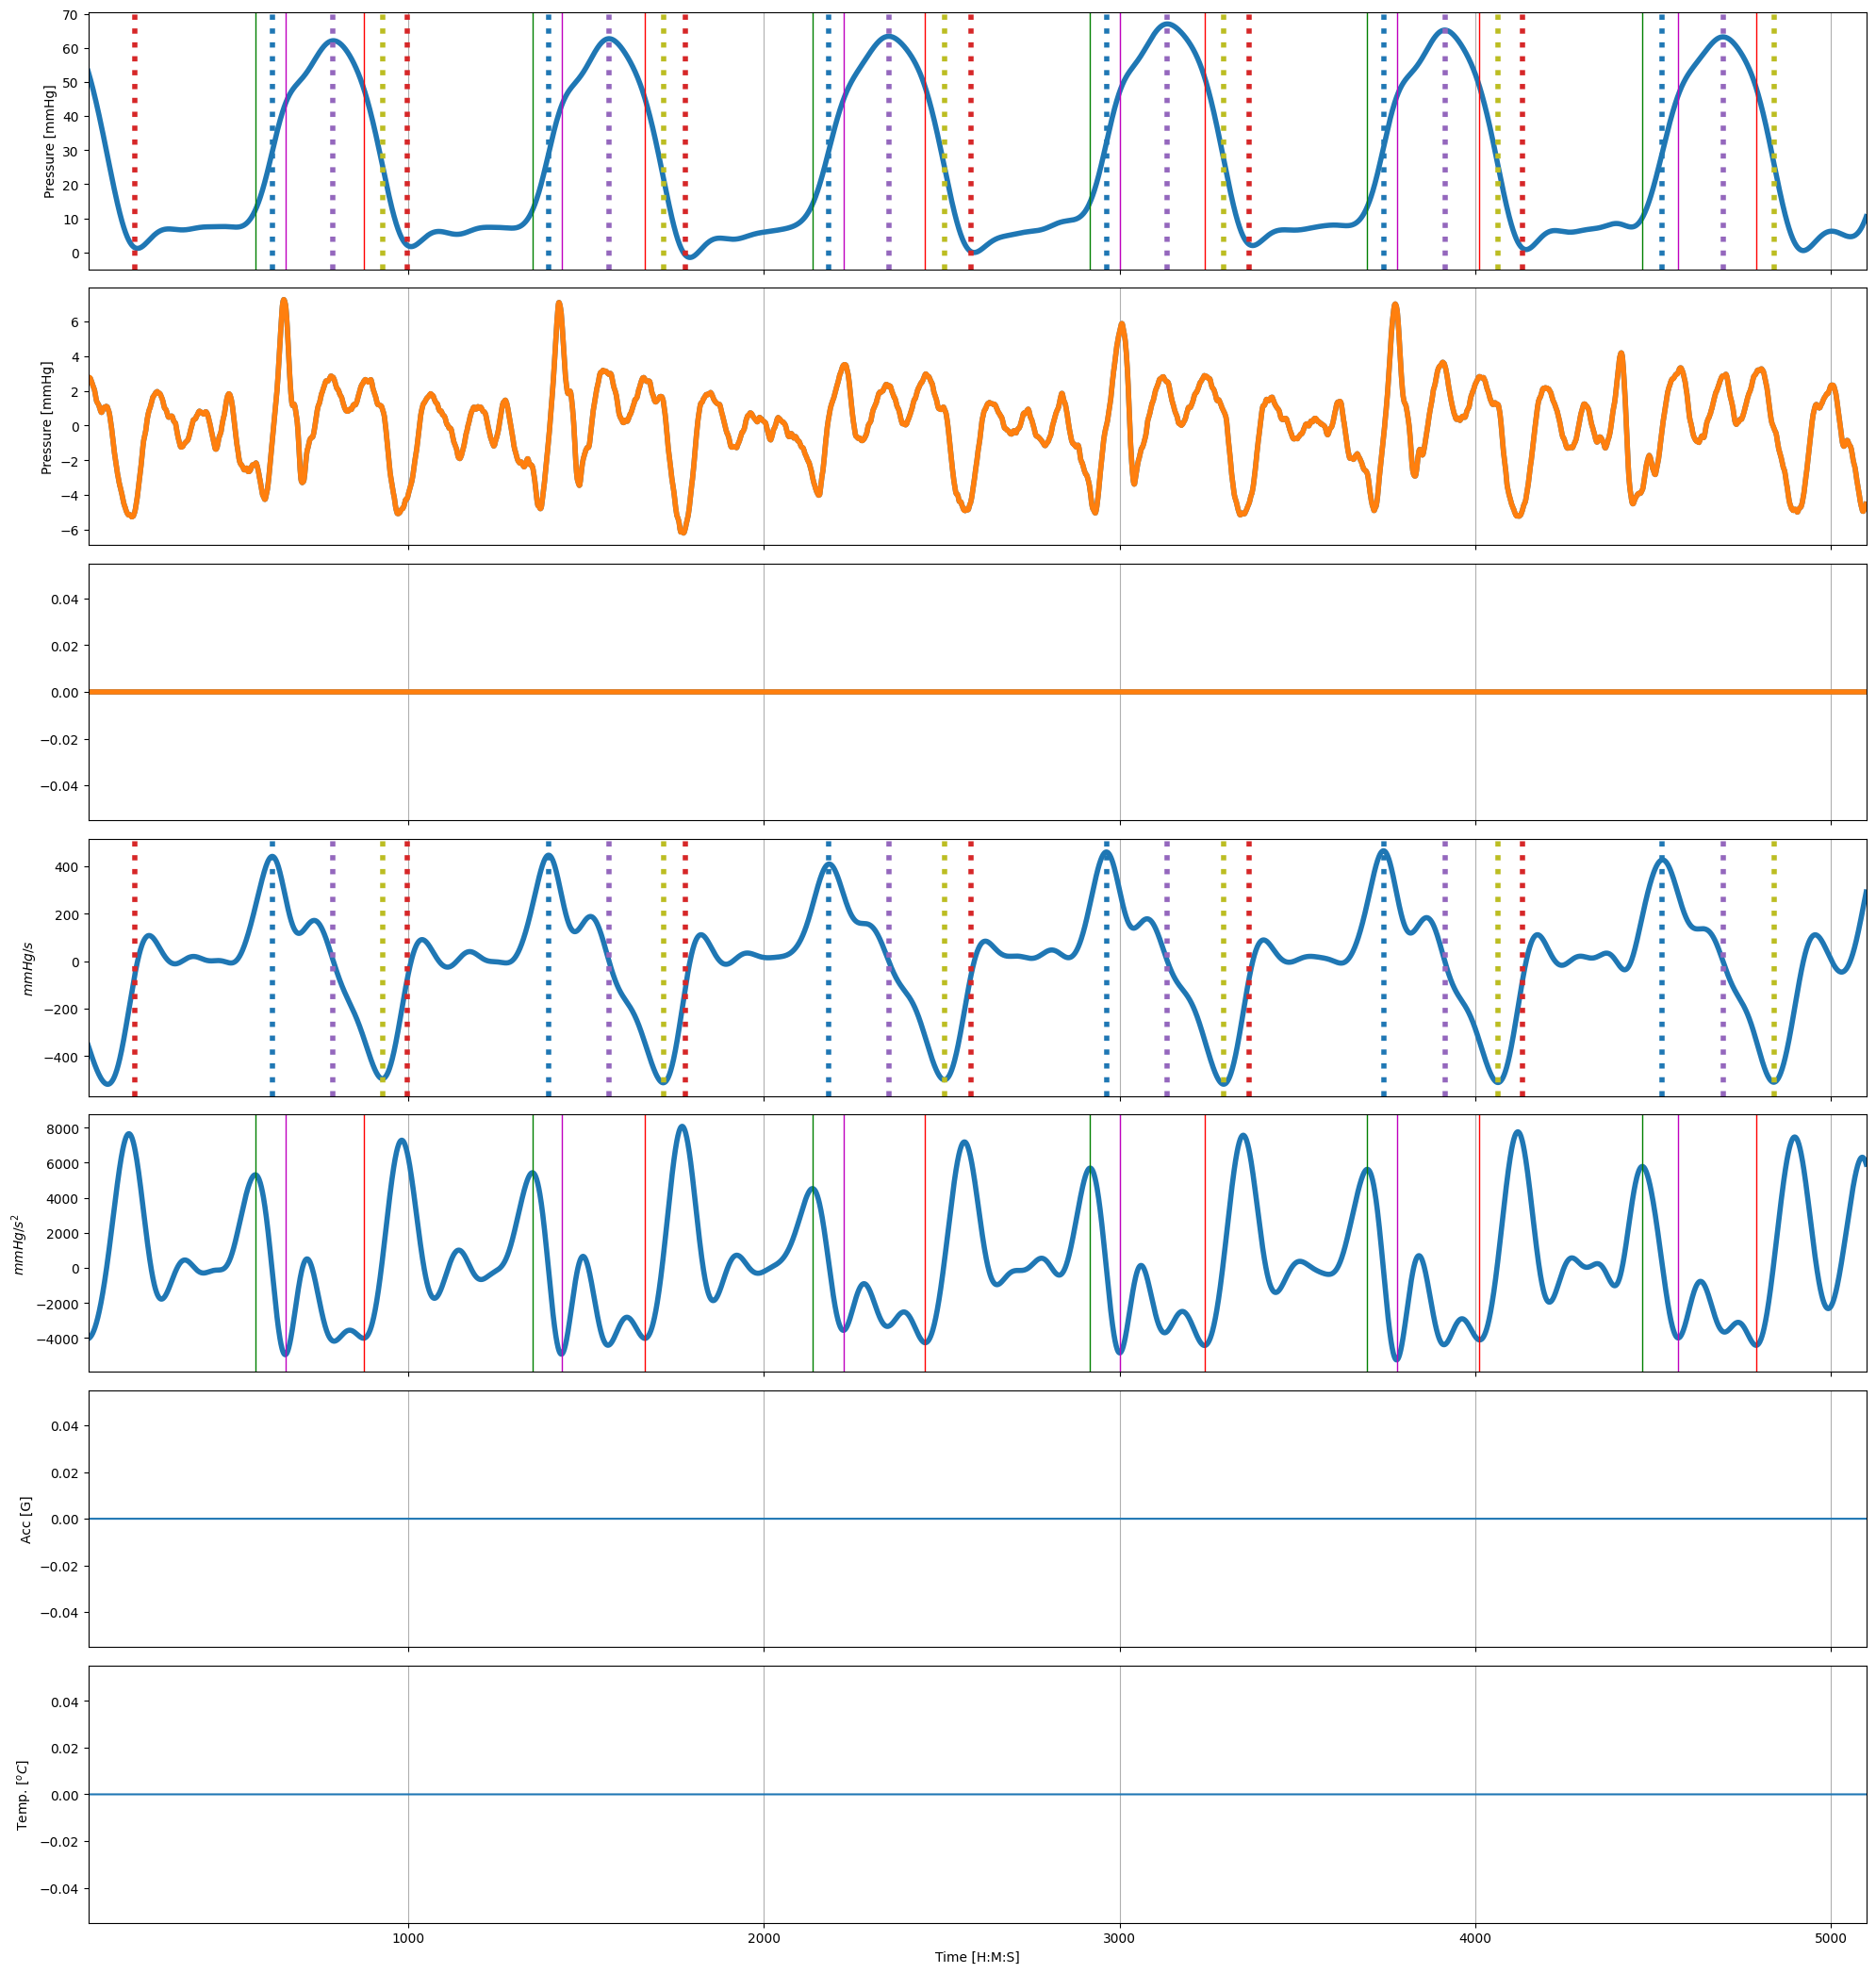

In [56]:
ag.plot_pressures(start=100, finish=100+5*1000, non_filter=False)

In [67]:
file_path = "CohortDataRaw2/output_real/pat_11"

rv_file = pd.read_csv(f"{file_path}/raw_data.csv")[:5000]


(<Figure size 2000x2100 with 7 Axes>,
 array([<Axes: ylabel='Pressure [mmHg]'>, <Axes: ylabel='Pressure [mmHg]'>,
        <Axes: >, <Axes: ylabel='$mmHg/s$'>, <Axes: ylabel='$mmHg/s^2$'>,
        <Axes: ylabel='Acc [G]'>,
        <Axes: xlabel='Time [H:M:S]', ylabel='Temp. [$^oC$]'>],
       dtype=object))

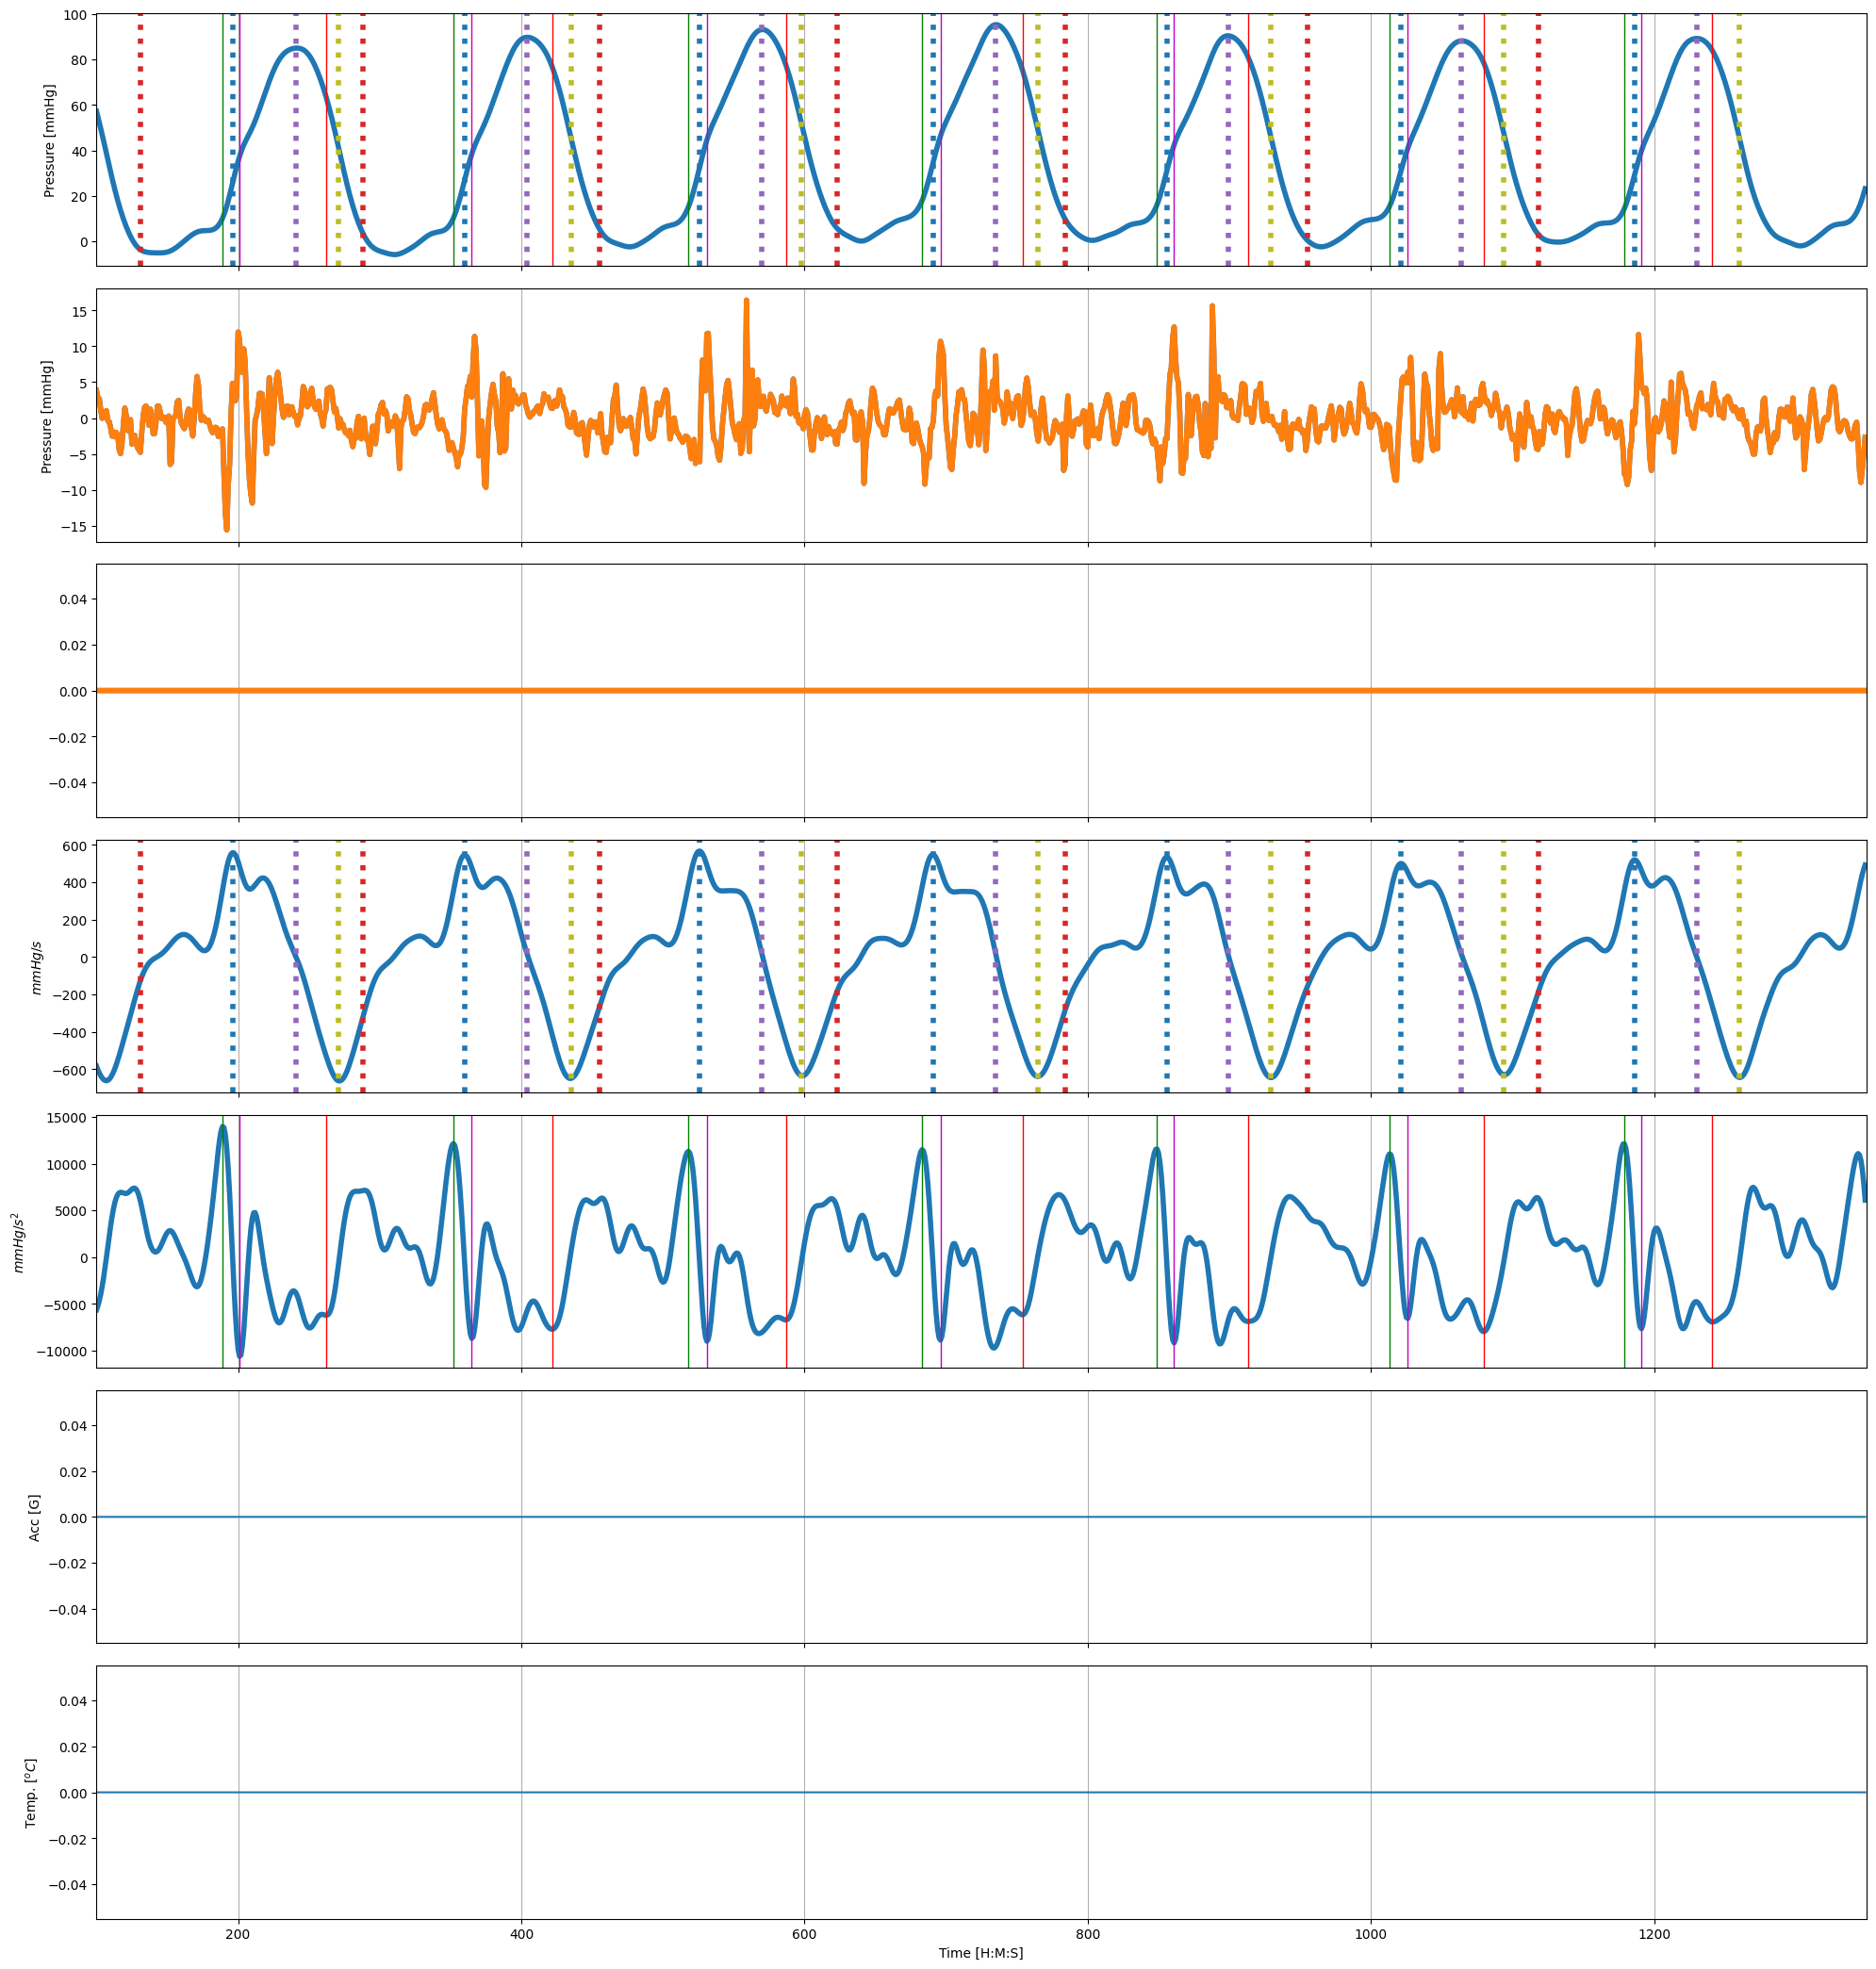

In [69]:
# Here takes all Pressure traces from step 1
rv_file[["Pressure", "cPressure"]] = rv_file[["Pressure [mmHg]", "Compensated Pressure [mmHg]"]]

ag = analyseGiessen(df=rv_file)

ag.compute_derivatives()
ag.compute_points_of_interest()
beats = pd.DataFrame(ag.resample_heart_beat())
sumstats = ag.points_df

ag.plot_pressures(start=100, finish=100+5*250, non_filter=False)